### Creating an AI product
# Example: Predict house price

This ML exmple includes parts from: https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch10/ch10.ipynb 

## EDA and Data prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Upload the data

Attributes:

1. **CRIM**      per capita crime rate by town
2. **ZN**        proportion of residential land zoned for lots over 25,000 sqft
3. **INDUS**     proportion of non-retail business acres per town
4. **CHAS**      Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. **NOX**       nitric oxides concentration (parts per 10 million)
6. **RM**        average number of rooms per dwelling
7. **AGE**       proportion of owner-occupied units built prior to 1940
8. **DIS**       weighted distances to five Boston employment centres
9. **RAD**       index of accessibility to radial highways
10. **TAX**      full-value property-tax rate per 10,000 USD
11. **PTRATIO**  pupil-teacher ratio by town
12. **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. **LSTAT**    % lower status of the population
14. **MEDV**     Median value of owner-occupied homes in 1000s USD

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Visualize the data

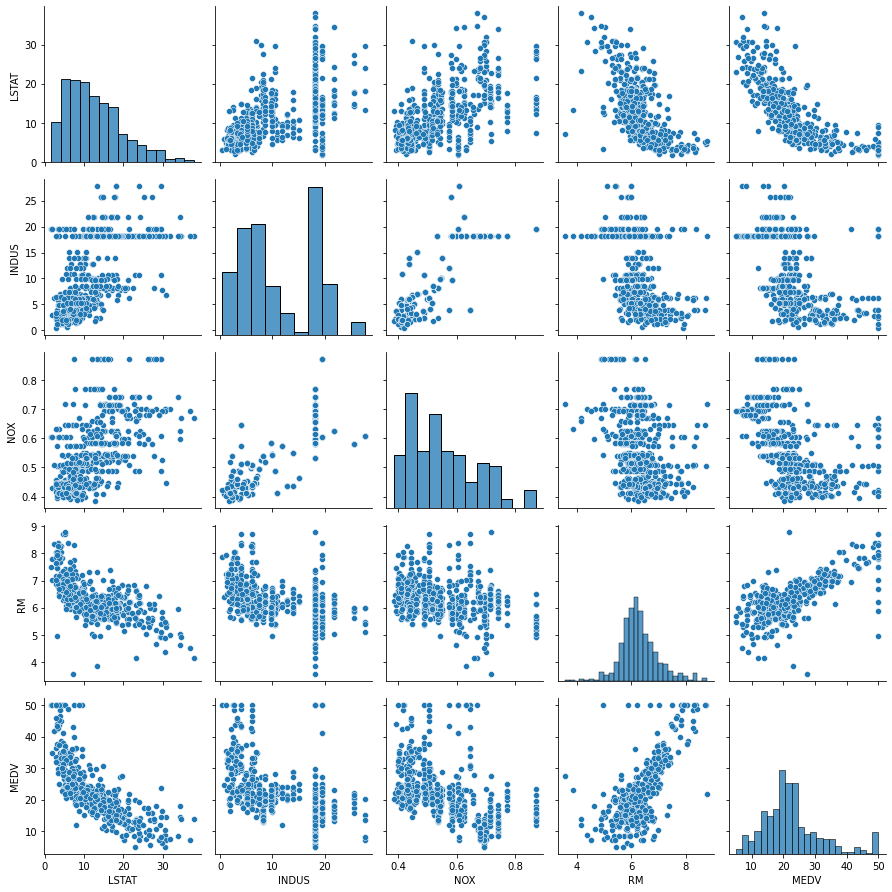

In [3]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
# Try adding parameters: corner=True, kind="kde"
# See more options in: https://seaborn.pydata.org/generated/seaborn.pairplot.html 
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

Try: Ask GPT help for your prefered visualization

## Split df to train and test

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1)  # Features
y = df['MEDV']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train and y_train are the training features and labels
# X_test and y_test are the testing features and labels


## Train and test models

### Model 1 - Linear Regression with all features

#### Train 

In [5]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

#### Test

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 24.291119474973584


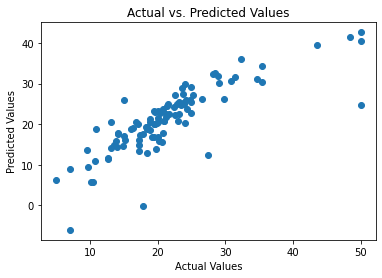

In [8]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

### Model 2 - Linear Regression for RM feature only

In [9]:
RM_train = X_train[['RM']]

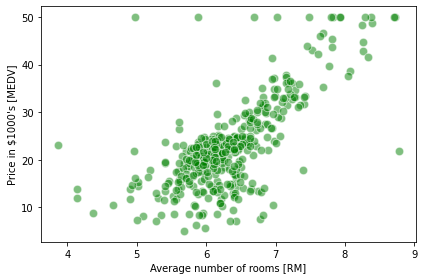

In [10]:
plt.scatter(RM_train, y_train, c='green', edgecolor='white', s=70, alpha=0.5)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
# plt.savefig('./figures/scikit_lr_fit.png', dpi=300)
plt.show()

In [11]:
slr = LinearRegression()
slr.fit(RM_train, y_train)

LinearRegression()

In [12]:
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.348
Intercept: -36.246


In [13]:
train_predict = slr.predict(RM_train)

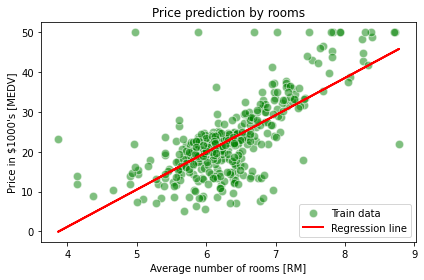

In [14]:
plt.scatter(RM_train, y_train, c='green', edgecolor='white', s=70, alpha=0.5, label = 'Train data')
plt.plot(RM_train['RM'].values, train_predict, color='red', linewidth=2, label = 'Regression line') 
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend()
plt.title('Price prediction by rooms')
plt.tight_layout()
# plt.savefig('./figures/scikit_lr_fit.png', dpi=300)
plt.show()

In [15]:
RM_test = X_test[['RM']]

In [16]:
# Make predictions on the test set
y_pred = slr.predict(RM_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 46.144775347317264


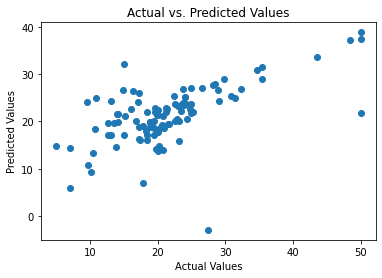

In [17]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

### Model 3 - Decision tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [20]:
# Make predictions on the test set
y_pred = tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 13.491273032995437


### Model 4 - Random Forest (RF)

In [21]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000, criterion='squared_error', random_state=1)

In [22]:
# Fit
rfr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8.886045435882307


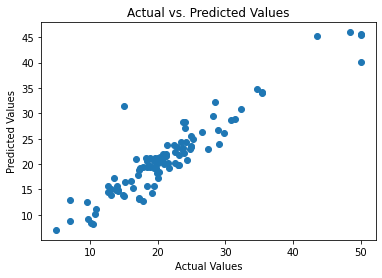

In [23]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [24]:
from sklearn.metrics import r2_score

# Make predictions on the train set
y_train_pred = rfr.predict(X_train)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_pred)))

MSE train: 1.831, test: 8.886
R^2 train: 0.979, test: 0.879


### Model 5 - GBM

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=1000, criterion='squared_error', random_state=1)

In [26]:
# Fit
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)


# Make predictions on the train set
y_train_pred = gbr.predict(X_train)

In [27]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_pred)))

MSE train: 0.004, test: 5.829
R^2 train: 1.000, test: 0.921


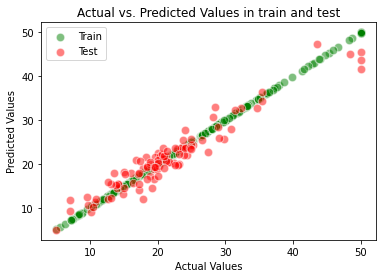

In [28]:
# Plot the actual vs. predicted values for Train (green) and Test (red)
plt.scatter(y_train, y_train_pred,c='green', edgecolor='white', s=70, alpha=0.5, label = 'Train')
plt.scatter(y_test, y_pred,c='red', edgecolor='white', s=70, alpha=0.5, label = 'Test')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Actual vs. Predicted Values in train and test')
plt.show()